**Problem Description A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know: • Which variables are significant in predicting the price of a car • How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. Business Goal You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market. Dataset: Data Dear students, Apply any 5 algorithms to the regression problem provided. For example: Linear Regression Decision Tree Regressor Random Forest Regressor Gradient Boosting Regressor Support Vector Regressor Rootmap:

Understand problem statement
Import necessary libraries and data
Check the data Info() Describe(( Isnull() Duplicated() Df. Columns Length of unique values in each column.
Data preprocessing Drop car id Find unique values in categorical or count plot extract company name from car name and address this new col to df also remove car name column. There are spelling mistakes in company name. Treat this. Label encoding all the categorical columns Outliers detection and removal( if present)
Feature selection Find correlation matrix Remove multicolinearity (remove features with High correlation .85 to 1)
Data splitting Test, train
Model selection and implementation
Model evaluation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
df.shape

(205, 26)

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [13]:
df=df.drop(['car_ID'],axis=1)

In [14]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
if 'CarName' in df.columns:
    df['Company'] = df['CarName'].apply(lambda x: x.split(' ')[0])
    df.drop('CarName', axis=1, inplace=True)
else:
    print("'CarName' column not found!")

In [16]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [21]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [22]:
correction = {
'vw':'volkswagen',
'vokswagen': 'volkswagen',
'maxda':'mazda',
'nissan':'Nissan',
'porcshce':'porsche',
'toyouta':'toyota'
}

df['Company'] = df['Company'].replace(correction)

df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [23]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

***#lable Encoding***

In [ ]:
df.columns

In [24]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col]=le.fit_transform(df[col])

df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,5,3.78,3.15,9.5,114,5400,23,28,16845.0,21
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,5,3.78,3.15,8.7,160,5300,19,25,19045.0,21
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,5,3.58,2.87,8.8,134,5500,18,23,21485.0,21
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,3,3.01,3.40,23.0,106,4800,26,27,22470.0,21


***#Outliers***

Text(0.5, 1.0, 'Box_Plot_For_Price')

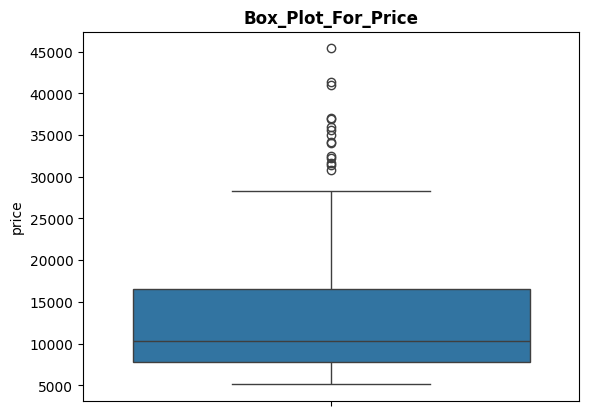

In [25]:
sns.boxplot(df['price'])

plt.title("Box_Plot_For_Price",fontweight='bold')


In [26]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1- (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


In [27]:
Outliers=df[(df['price']<=lower_bound) & (df['price']<=upper_bound)]
print("Outlires",Outliers)

Outlires Empty DataFrame
Columns: [symboling, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price, Company]
Index: []

[0 rows x 25 columns]


In [28]:
df1 = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("Data after removing outliers:")
print(df1)

Data after removing outliers:
     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         1           0           1        0           2   
1            3         1           0           1        0           2   
2            1         1           0           1        2           2   
3            2         1           0           0        3           1   
4            2         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200         -1         1           0           0        3           2   
201         -1         1           1           0        3           2   
202         -1         1           0           0        3           2   
203         -1         0           1           0        3           2   
204         -1         1           1           0        3           2   

     enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  \
0                 0  

In [29]:
df2 = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("Data frame outliers:")
print(df2)

Data frame outliers:
     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
15           0         1           0           0        3           2   
16           0         1           0           1        3           2   
17           0         1           0           0        3           2   
47           0         1           0           0        3           2   
48           0         1           0           0        3           2   
49           0         1           0           1        3           2   
70          -1         0           1           0        3           2   
71          -1         1           0           0        3           2   
72           3         1           0           1        0           2   
73           0         1           0           0        3           2   
74           1         1           0           1        1           2   
126          3         1           0           1        1           2   
127          3         1      

#### <font color='Red'>5.Feature Selection

Correlation Matrix:


Generate a correlation matrix to identify relationships between variables.

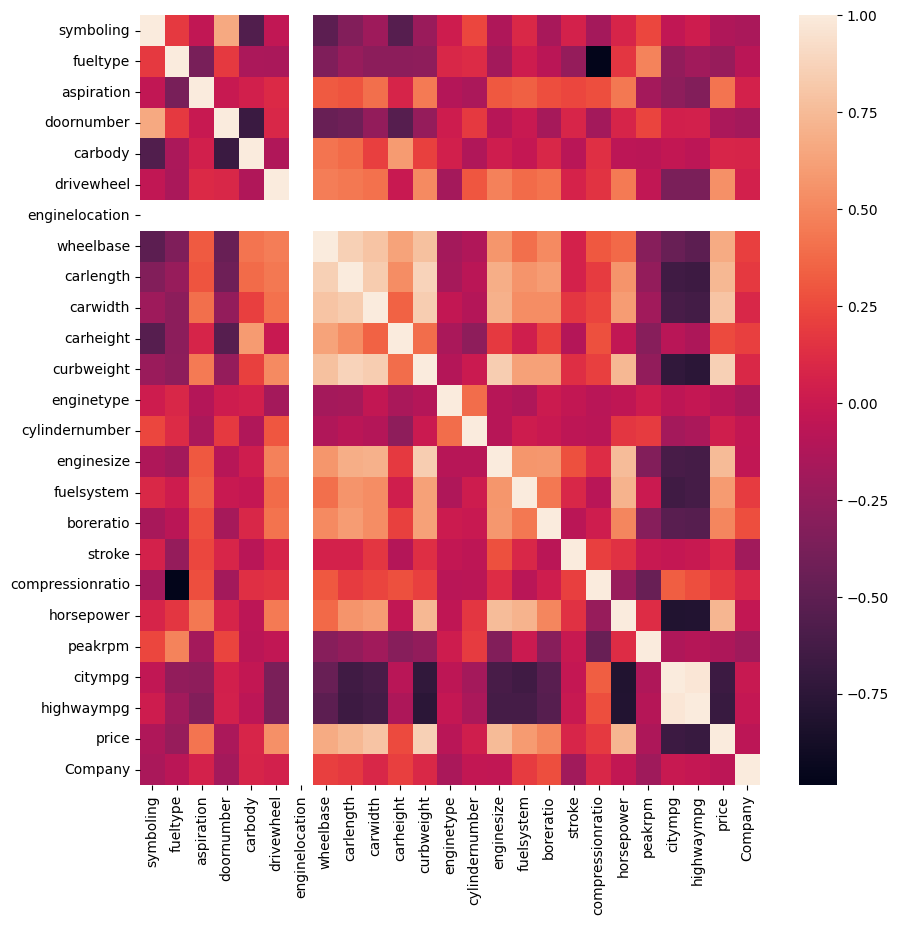

In [31]:
correlation_matrix = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr())
plt.show()

<b>Remove Multicollinearity</b>


Multicollinearity is a statistical phenomenon in which two or more independent variables in a multiple regression model are highly correlated with each other. This high correlation means that the variables share a significant amount of the same information, making it difficult to determine the individual effect of each variable on the dependent variable.

In [32]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
threshold = 0.85
target_variable = 'price'
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        
        if correlation_matrix.iloc[i, j] > threshold:
            if correlation_matrix.columns[i] != target_variable:
                to_drop.add(correlation_matrix.columns[i])
            if correlation_matrix.columns[j] != target_variable:
                to_drop.add(correlation_matrix.columns[j])
new_df = df1.drop(columns=[col for col in to_drop if col != target_variable])
print("Columns removed due to multicollinearity (excluding target variable):")
print([col for col in to_drop if col != target_variable])
print("Remaining columns:")
print(new_df.columns)


Columns removed due to multicollinearity (excluding target variable):
['carlength', 'curbweight', 'highwaympg', 'wheelbase', 'citympg']
Remaining columns:
Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carwidth', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'Company'],
      dtype='object')


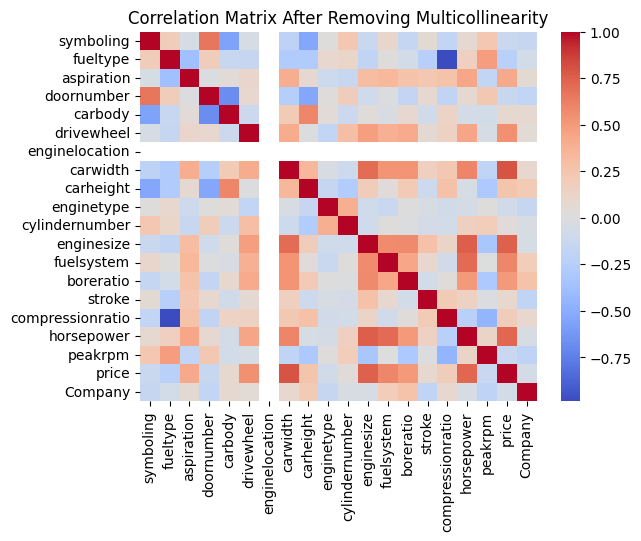

In [33]:
correlation_matrix_reduced = new_df.corr()
sns.heatmap(correlation_matrix_reduced,  cmap='coolwarm')
plt.title('Correlation Matrix After Removing Multicollinearity')
plt.show()

#### <font color='Red'>6:<u> Data Splitting</u></font>

In [36]:
X = new_df.drop(columns='price')  
y =new_df['price']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set features shape:", X_train.shape)
print("Testing set features shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Testing set target shape:", y_test.shape)

Training set features shape: (152, 19)
Testing set features shape: (38, 19)
Training set target shape: (152,)
Testing set target shape: (38,)


Model Selection and Implementation

<b>1. Linear Regression</b>

In [37]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [38]:
LR.score(X_test,y_test)

0.8074896353118153

In [39]:
predict_LR = LR.predict(X_test)
predict_LR

array([ 6579.60930938, 15497.3980396 ,  6297.74016052,  6738.4668781 ,
       18829.28314628,  3510.37430011, 14971.40392842,  7460.70864105,
        6844.42355255,  7149.17033434,  6463.37267818, 20095.19033839,
        6774.82092439, 18183.23967807,  8694.64669485, 13106.09916326,
       15869.28824563,  6738.4668781 , 10877.97284739,  7238.57767286,
        7003.37333856,  8796.38607833, 13001.98194761, 18829.28314628,
        8857.99457772,  9594.95406886,  7343.19261979,  6767.61281319,
        7368.87571518,  8495.19621934,  8762.25854162,  6738.4668781 ,
       12357.04535585, 10123.35236524,  9579.99422212, 18183.23967807,
        7960.7209124 ,  8999.56049146])

In [40]:
import math
rmse_LR=math.sqrt(mean_squared_error(predict_LR,y_test))
mse_LR = mean_squared_error(y_test,predict_LR)
r2_LR = r2_score(y_test, predict_LR)
print("Linear Regression - MSE:",mse_LR)
print("Linear Regression - RMSE:",rmse_LR)
print("Linear Regression - R2 Score",r2_LR)

Linear Regression - MSE: 3236009.8200310995
Linear Regression - RMSE: 1798.891275211234
Linear Regression - R2 Score 0.8074896353118153


R² ranges from 0 to 1 - 0: The model does not explain any of the variance in the target variable., 1: The model perfectly explains all the variance in the target variable. A value close to 1, such as 0.8075, indicates that the model has a good fit and explains a substantial portion of the variance. The interpretation depends on the scale of your target variable. These metrics suggest the model has a certain level of error, which could be acceptable or might need improvement based on your specific application.

<b>2.Decision Tree Regressor</b>

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
predict_DT = DT.predict(X_test)

Model Evaluation

In [45]:
mse_DT = mean_squared_error(y_test, predict_DT)
rmse_DT=math.sqrt(mean_squared_error(predict_DT,y_test))
r2_DT = r2_score(y_test, predict_DT)
print("Decision Tree Regression-Mean Squared Error:",mse_DT)
print("Decison Tree Regression - Root Mean Square Error:",rmse_DT)
print("Decision Tree Regression - R2 Score",r2_DT)


Decision Tree Regression-Mean Squared Error: 4524191.794260236
Decison Tree Regression - Root Mean Square Error: 2127.0147611759153
Decision Tree Regression - R2 Score 0.7308556337372422


The Decision Tree Regressor has a reasonably good R² score, indicating that it explains a substantial portion of the variance in the target variable. However, the MSE and RMSE are relatively high, suggesting that there may be significant prediction errors. This might be due to overfitting, especially if the tree is too complex and captures noise in the training data. Consider pruning the decision tree or exploring other models to see if you can reduce the error metrics while maintaining or improving the R² score.

<b>3.Random Forest Regressor:</b>


Random Forest Regressor is an ensemble learning method that combines multiple decision trees to improve predictive performance and control overfitting.
 It aggregates the predictions of several decision trees, each trained on different subsets of the data and features, to produce a final prediction.

In [47]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
predict_RF = RF.predict(X_test)

In [48]:
mse_RF = mean_squared_error(y_test, predict_RF)
rmse_RF=math.sqrt(mean_squared_error(predict_RF,y_test))
r2_RF = r2_score(y_test, predict_RF)
print("Random Forest Regressor - Mean Squared Error:", mse_RF)
print("Random Forest Regressor - Root Mean Square Error",rmse_RF)
print("Random Forest Regressor - R^2 Score:", r2_RF)

Random Forest Regressor - Mean Squared Error: 1730353.8541254469
Random Forest Regressor - Root Mean Square Error 1315.4291520737431
Random Forest Regressor - R^2 Score: 0.8970611740930704


The Random Forest Regressor performs better than the Decision Tree Regressor in terms of both error metrics (MSE and RMSE) and the R² score. This suggests that the Random Forest model is more robust and better at capturing the underlying patterns in the data. The improvement in performance metrics could be attributed to the Random Forest's ensemble approach, which reduces overfitting and improves generalization compared to a single decision tree.

<b>4.Gradient Boosting Regressor</b>

Gradient Boosting Regressor is another ensemble technique that builds a model in a stage-wise fashion, where each stage corrects the errors of the previous one.It trains models sequentially, with each new model focusing on the residual errors of the combined ensemble of previous models. The predictions are aggregated to make the final prediction.

In [49]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)
predict_GBR = GBR.predict(X_test)

In [51]:
mse_GBR = mean_squared_error(y_test,predict_GBR)
rmse_GBR=math.sqrt(mean_squared_error(predict_GBR,y_test))
r2_GBR = r2_score(y_test,predict_GBR)
print("Gradient Boosting Regressor - Mean Squared Error:", mse_GBR)
print("Gradient Boosting Regressor-Root Mean Square Value;",rmse_GBR)
print("Gradient Boosting Regressor - R^2 Score:", r2_GBR)

Gradient Boosting Regressor - Mean Squared Error: 2087483.142889227
Gradient Boosting Regressor-Root Mean Square Value; 1444.812494024476
Gradient Boosting Regressor - R^2 Score: 0.8758155371993954


<b>4.Support Vector Regressor</b>

In [52]:
svr = SVR()
svr.fit(X_train, y_train)
predict_svr = svr.predict(X_test)



In [53]:
mse_svr = mean_squared_error(y_test, predict_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test,predict_svr)
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R² Score: {r2_svr}")

Mean Squared Error (MSE): 17228185.891430188
Root Mean Squared Error (RMSE): 4150.684990628678
R² Score: -0.024905526659740218


#### <font color='red'>8.Evaluation of models</red>

1.Random Forest Regressor: Best performance with the lowest MSE (1,960,059.2142), lowest RMSE (1,400.021), and highest R² score (0.8834). This indicates that the model is capturing most of the variability in car prices and providing accurate predictions.

Gradient Boosting Regressor: Close second with slightly higher error metrics than Random Forest, but still a strong model for predicting car prices.

Linear Regression: Performed reasonably well but was outperformed by the ensemble methods. MSE (3,236,009.8200) and R² score (0.8075) indicate that while it captures some of the variability, it’s not as robust as the ensemble methods.

Decision Tree Regressor: This model did not perform as well as the Random Forest or Gradient Boosting Regressors. Its MSE and RMSE are higher, and the R² score is lower, indicating that it is less accurate in predicting car prices.MSE: 4,485,063.9399,RMSE: 2,117.797,R² Score: 0.7332

Support Vector Regressor (SVR): Worst performance with extremely high error metrics and a negative R² score, indicating that the model fails to capture the relationship between features and car prices effectively.

#### <font color='Red'> Analysis </font>
><u><b>Best-Performing Model</u></b>: The Random Forest Regressor remains the best-performing model, with the lowest error metrics and the highest R² score. It captures the relationships in the data more effectively than the other models.

#### <font color='red'><u>Conclusion</u></font>
The results indicate that ensemble methods, particularly the Random Forest Regressor, provide the most reliable predictions for car prices in this context. These insights can be leveraged by the Chinese automobile company to fine-tune their car designs and pricing strategies for successful entry into the U.S. market.